<a href="https://colab.research.google.com/github/BrunoLopes011/EntregaMVP2/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Bruno_dos_Santos_Lopes_4052025000271.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Bruno dos Santos Lopes

**Matrícula:** 4052025000271

**Dataset:** https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema

O conjunto de dados Instacart Market Basket Analysis consiste em informações detalhadas sobre pedidos realizados por clientes em uma plataforma de supermercado online. Ele registra o comportamento de compra de milhares de usuários, incluindo os produtos adquiridos, a ordem em que foram adicionados ao carrinho, o horário do pedido, entre outras informações.

O objetivo principal deste trabalho é analisar o comportamento de consumo dos usuários e identificar padrões nas compras, como a frequência de determinados produtos, recorrência por horário ou dia da semana, e associações entre departamentos e categorias. Essa análise pode apoiar futuras estratégias de recomendação, marketing e reposição de estoque.

## Hipóteses do Problema

As hipóteses são as seguintes:

Os usuários apresentam padrões de compra recorrentes em determinados dias da semana ou horários?

Alguns produtos ou categorias têm maior probabilidade de serem comprados juntos?

Há produtos com alta taxa de recompra que merecem atenção na gestão de estoque?

Certos departamentos concentram a maior parte das vendas?

## Tipo de Problema

Este é um problema de análise não supervisionada, voltado à descoberta de padrões e ao pré-processamento de dados transacionais. Não há uma variável-alvo definida para previsão neste estágio; o foco está na compreensão e preparação dos dados.



## Seleção de Dados

O dataset foi escolhido por ser realista e robusto, disponibilizado originalmente na plataforma Kaggle. Ele não foi utilizado durante as aulas da disciplina e oferece um cenário prático que simula o funcionamento de uma grande operação de e-commerce alimentar. A base passou por uma curadoria prévia e está disponível em formato CSV.

## Atributos do Dataset

O dataset contém diversos arquivos, cada um com diferentes propósitos. Os principais atributos são:
order_id: identificador único do pedido
user_id: identificador único do usuário
order_number: número sequencial do pedido por usuário
order_dow: dia da semana em que o pedido foi feito (0 = domingo)
order_hour_of_day: hora do dia em que o pedido foi feito
days_since_prior_order: número de dias desde o último pedido
product_id: identificador do produto
product_name: nome do produto
aisle_id: identificador do corredor (subcategoria)
aisle: nome do corredor
department_id: identificador do departamento (categoria principal)
department: nome do departamento
add_to_cart_order: ordem em que o produto foi adicionado ao carrinho
reordered: indica se o produto foi recomprado (1) ou não (0)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
# Bibliotecas para análise e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
# Configuração visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
#Leitura dos arquivos
arquivos = {
    "products.csv": "1VWPE_9MccahjXwrjeN6lfR5b7QYHfNK4",
    "aisles.csv": "1gtG-hEJ_2g8iLtk9tqFAgOz6ZEgejkbG",
    "departments.csv": "1bCtG9r4SgykolPlOQudPHv-ccXyumMOt",
    "orders.csv": "1BODQmryyUFatprz8lGGXT5WjebkbtclN",
    "order_products__train.csv": "1qun5H3NCkW0Io7EHH-OoCKI9EvLb0c0w",
    "order_products__prior.csv": "1sYXcxBgZpL-vxF7evCuVG5eztHOq9VYs",
}

# Baixa apenas os arquivos que ainda não existem
for nome, file_id in arquivos.items():
    if not os.path.exists(nome):
        print(f"📥 Baixando {nome}...")
        gdown.download(id=file_id, output=nome, quiet=False)
    else:
        print(f"✅ {nome} já está em cache. Pulando download.")

# Leitura dos arquivos com pandas
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
order_products_train = pd.read_csv("order_products__train.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")

✅ products.csv já está em cache. Pulando download.
✅ aisles.csv já está em cache. Pulando download.
✅ departments.csv já está em cache. Pulando download.
✅ orders.csv já está em cache. Pulando download.
✅ order_products__train.csv já está em cache. Pulando download.
✅ order_products__prior.csv já está em cache. Pulando download.


In [ ]:
# Visualização das primeiras linhas de cada dataset

print("📦 Produtos")
display(products.head())

print("🛒 Pedidos")
display(orders.head())

print("📑 Itens dos Pedidos (order_products_train)")
display(order_products_train.head())

print("📑 Itens dos Pedidos (order_products_prior)")
display(order_products_prior.head())

print("📂 Categorias (departments)")
display(departments.head())

print("📁 Corredores (aisles)")
display(aisles.head())

📦 Produtos


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


🛒 Pedidos


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


📑 Itens dos Pedidos (order_products_train)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


📑 Itens dos Pedidos (order_products_prior)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


📂 Categorias (departments)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


📁 Corredores (aisles)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


# Análise de Dados

Nesta etapa de Análise Exploratória de Dados (EDA), o objetivo é compreender a estrutura e as relações presentes no dataset Instacart Market Basket Analysis. Por meio de visualizações, estatísticas descritivas e cruzamentos, buscamos insights sobre o comportamento de consumo dos usuários, como padrões de horário e dia da semana, frequência de recompra e popularidade de produtos, categorias e departamentos. Essa análise é essencial para fundamentar decisões em fases posteriores, como recomendações, estratégias de marketing ou gestão de estoque.

## Total e Tipo das Instâncias

O conjunto de dados Instacart é composto por múltiplos arquivos, sendo os principais:

orders.csv: contém 3.421.083 registros de pedidos realizados por 206.209 usuários.

order_products__prior.csv: possui informações de 32.434.489 produtos comprados anteriormente.

order_products__train.csv: contém 1.384.617 registros que podem ser usados para testes ou validação de modelos.

products.csv, departments.csv, aisles.csv: detalham os produtos, suas categorias e subcategorias.

In [ ]:
print("📦 Pedidos (orders.csv):")
print(orders.info())

print("\n🛒 Produtos comprados anteriormente (order_products__prior.csv):")
print(order_products_prior.info())

📦 Pedidos (orders.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None

🛒 Produtos comprados anteriormente (order_products__prior.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None


 Distribuição dos Pedidos por Dia da Semana

/tmp/ipython-input-31-412347816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=orders, palette="Blues_d")


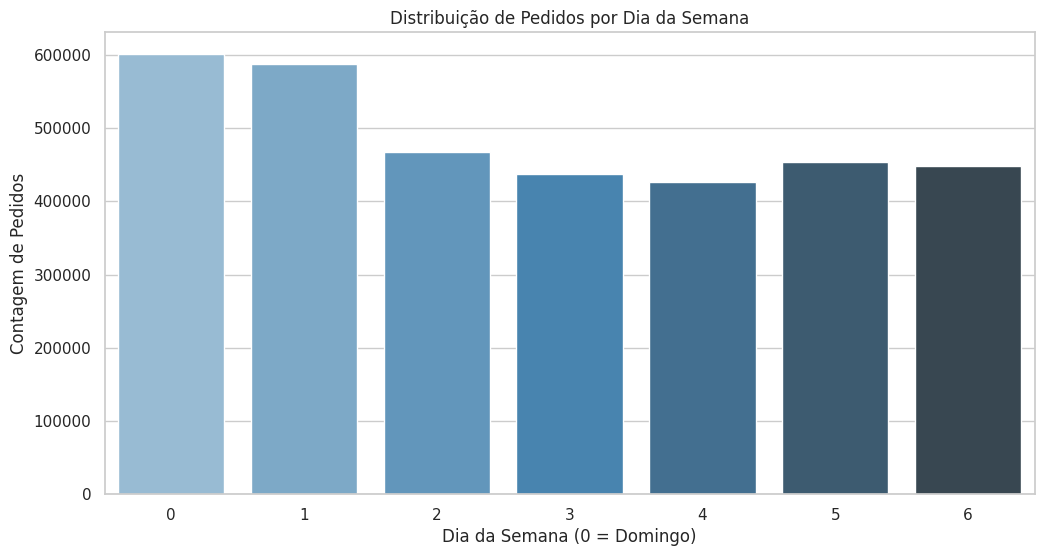

In [ ]:
sns.countplot(x='order_dow', data=orders, palette="Blues_d")
plt.title('Distribuição de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Contagem de Pedidos')
plt.show()

Este gráfico permite identificar em quais dias da semana há maior volume de pedidos, possibilitando observar padrões de consumo recorrentes.

 Distribuição dos Pedidos por Hora do Dia

/tmp/ipython-input-32-4126393545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour_of_day', data=orders, palette="Oranges_d")


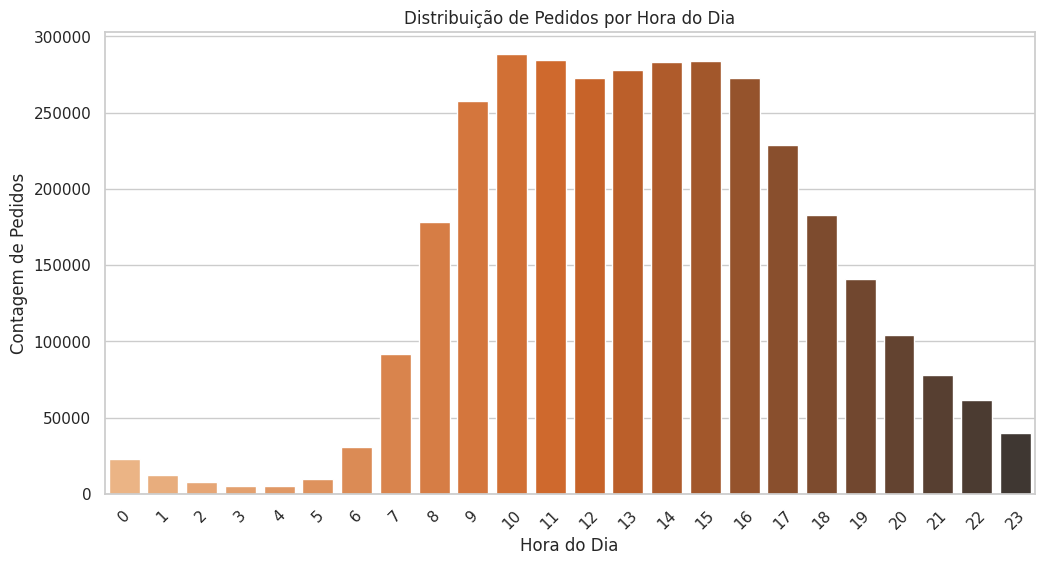

In [ ]:
sns.countplot(x='order_hour_of_day', data=orders, palette="Oranges_d")
plt.title('Distribuição de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem de Pedidos')
plt.xticks(rotation=45)
plt.show()

Essa visualização ajuda a identificar os horários de maior atividade na plataforma, o que pode ser relevante para estratégias de marketing ou alocação de recursos.

Produtos Mais Frequentes

/tmp/ipython-input-33-1233367889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="viridis")


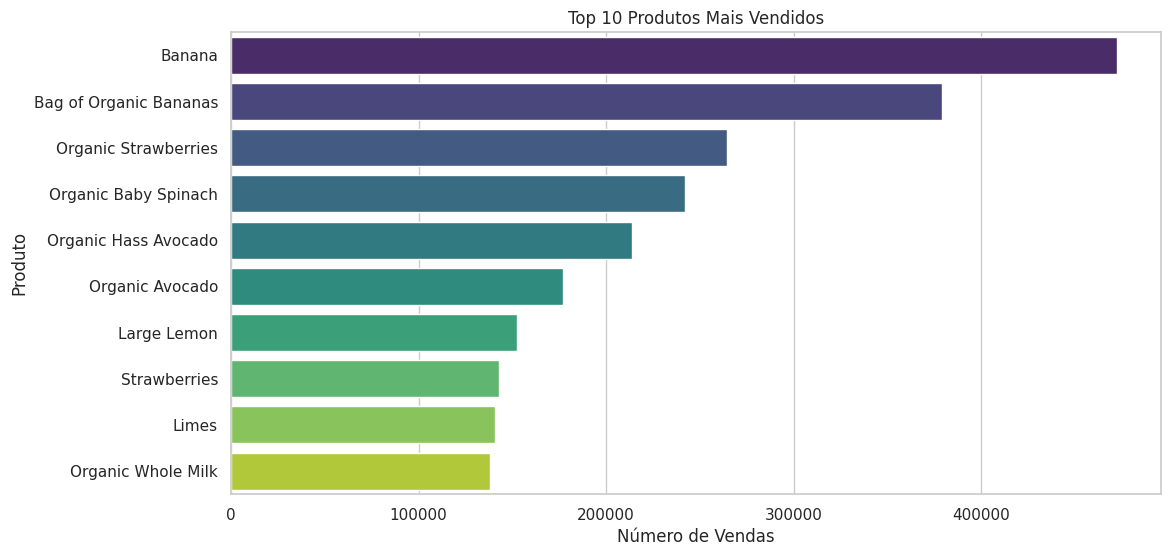

In [ ]:
# Merge para obter o nome dos produtos
produtos_freq = order_products_prior.merge(products, on='product_id')
top_produtos = produtos_freq['product_name'].value_counts().head(10)

sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="viridis")
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Número de Vendas')
plt.ylabel('Produto')
plt.show()

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas do dataset, incluindo média, desvio padrão, valores mínimos e máximos, além dos quartis. Esses dados são essenciais para compreender o comportamento médio de compra dos usuários, a frequência dos pedidos e os horários mais comuns de compras.

In [ ]:
# Estatísticas descritivas para as principais variáveis numéricas
orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


### Média

A média é uma medida de tendência central que representa o valor típico de uma variável. No contexto do nosso dataset, ela pode indicar, por exemplo:

Quantos pedidos um usuário costuma realizar em média.

Quais horários são mais comuns para a realização de pedidos.

A frequência média entre pedidos.

In [ ]:
orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].mean()

,0
order_number,17.154858
order_dow,2.776219
order_hour_of_day,13.452015
days_since_prior_order,11.114836


Gráfico sugerido para a média:
Um gráfico de barras horizontal pode ser uma boa escolha para comparar visualmente a média entre variáveis:

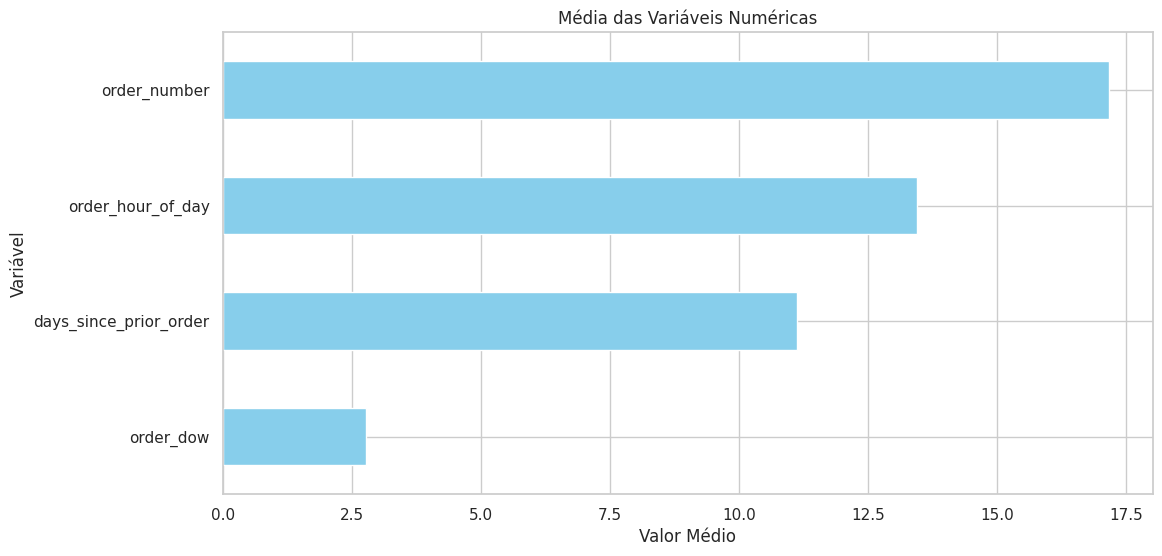

In [ ]:
media = orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].mean()
media.sort_values().plot(kind='barh', color='skyblue')
plt.title('Média das Variáveis Numéricas')
plt.xlabel('Valor Médio')
plt.ylabel('Variável')
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que mostra o quanto os dados variam em torno da média. Quanto maior o desvio padrão, mais espalhados estão os dados. Isso pode nos indicar, por exemplo, se os usuários seguem padrões rígidos ou variados em seus comportamentos de compra.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].std()

,0
order_number,17.733164
order_dow,2.046829
order_hour_of_day,4.226088
days_since_prior_order,9.206737


Gráfico sugerido para o desvio padrão:
Usamos também um gráfico de barras horizontal, semelhante ao anterior, facilitando a comparação com a média.

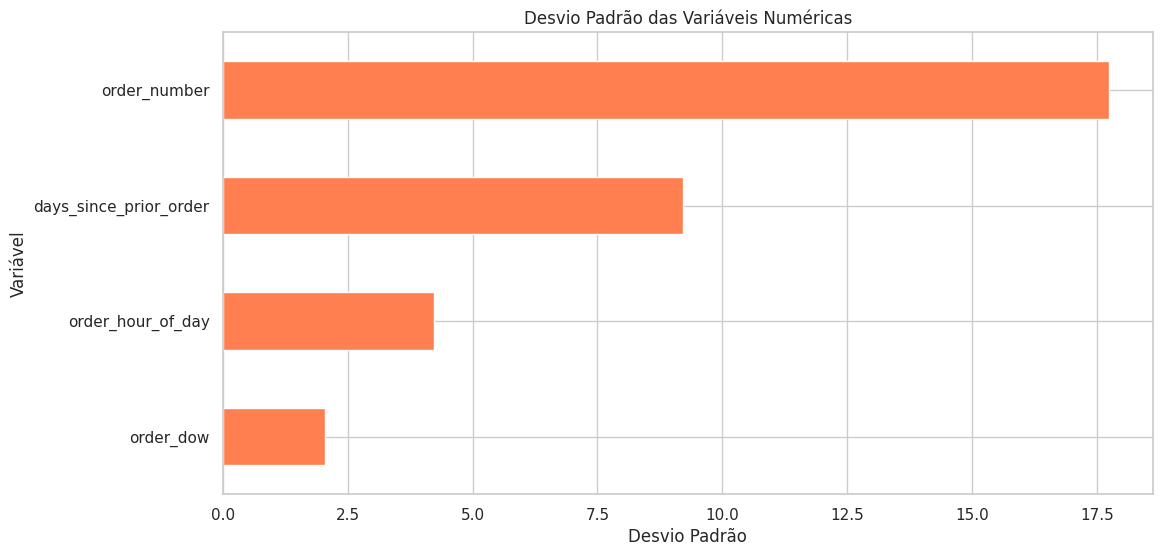

In [ ]:
desvio = orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].std()
desvio.sort_values().plot(kind='barh', color='coral')
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variável')
plt.show()

## Histograma

O histograma é uma das formas mais eficazes de visualizar a distribuição de uma variável. Vamos observar, por exemplo, como se distribui a variável days_since_prior_order, que indica o número de dias entre pedidos consecutivos de um usuário.

Essa variável é importante porque nos permite compreender a frequência de recompra no sistema.

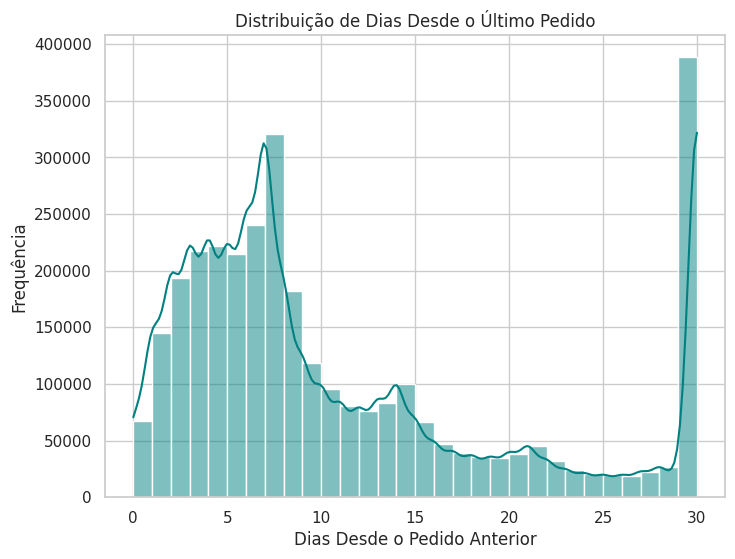

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(orders['days_since_prior_order'].dropna(), kde=True, bins=30, color='teal')
plt.title('Distribuição de Dias Desde o Último Pedido')
plt.xlabel('Dias Desde o Pedido Anterior')
plt.ylabel('Frequência')
plt.show()

A variável days_since_prior_order apresenta picos evidentes em 7, 14, 21 e 30 dias, indicando que muitos usuários seguem padrões semanais ou mensais para suas compras — comportamento típico em compras domésticas.

### *Distribuição dos Dias Desde o Pedido Anterior*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

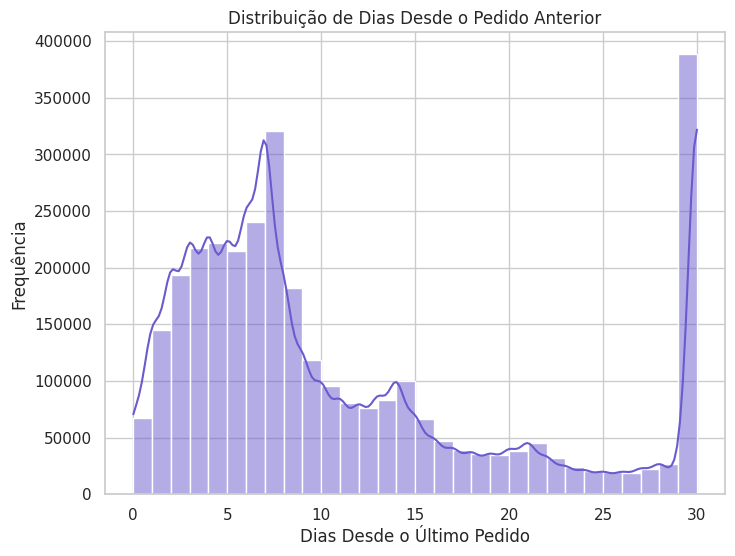

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(orders['days_since_prior_order'].dropna(), kde=True, bins=30, color='slateblue')
plt.title('Distribuição de Dias Desde o Pedido Anterior')
plt.xlabel('Dias Desde o Último Pedido')
plt.ylabel('Frequência')
plt.show()

A distribuição é multimodal, com picos visíveis em 7, 14, 21 e 30 dias — indicando que muitos clientes seguem ciclos semanais ou mensais de compra, padrão comum em compras domésticas.

### *Distribuição por Hora do Dia*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

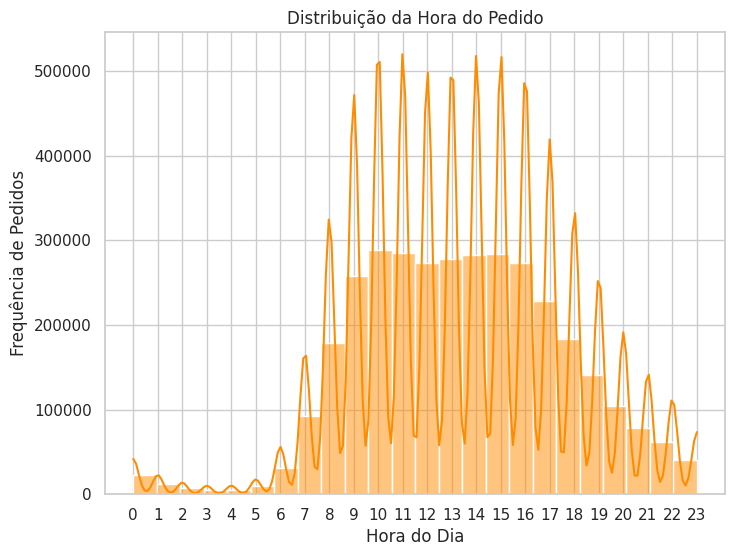

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(orders['order_hour_of_day'], kde=True, bins=24, color='darkorange')
plt.title('Distribuição da Hora do Pedido')
plt.xlabel('Hora do Dia')
plt.ylabel('Frequência de Pedidos')
plt.xticks(range(0, 24))
plt.show()

A maior parte dos pedidos ocorre entre 8h e 17h, com um pico pela manhã. Isso pode estar relacionado a compras feitas antes ou durante o expediente, o que é útil para estratégias de marketing e logística.

 ### *Distribuição por Dia da Semana*

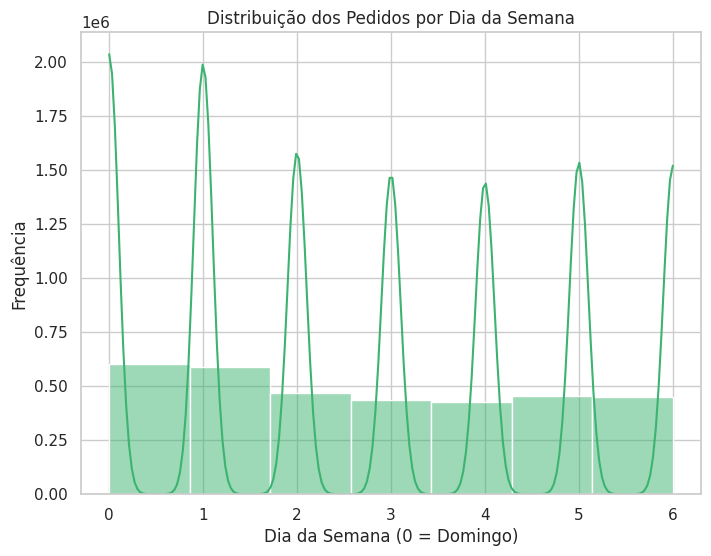

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(orders['order_dow'], kde=True, bins=7, color='mediumseagreen')
plt.title('Distribuição dos Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Frequência')
plt.xticks(range(7))
plt.show()

Há um volume elevado de compras entre domingo (0) e segunda-feira (1), o que pode indicar que muitos consumidores fazem suas compras semanais no início da semana.

## Boxplots por Faixa de Hora ou Dia

Agora vamos explorar como o número de pedidos varia por hora ou dia usando boxplots agrupados.

Distribuição de Dias Entre Pedidos por Hora do Dia

/tmp/ipython-input-43-989888202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_hour_of_day', y='days_since_prior_order', data=orders, palette='coolwarm')


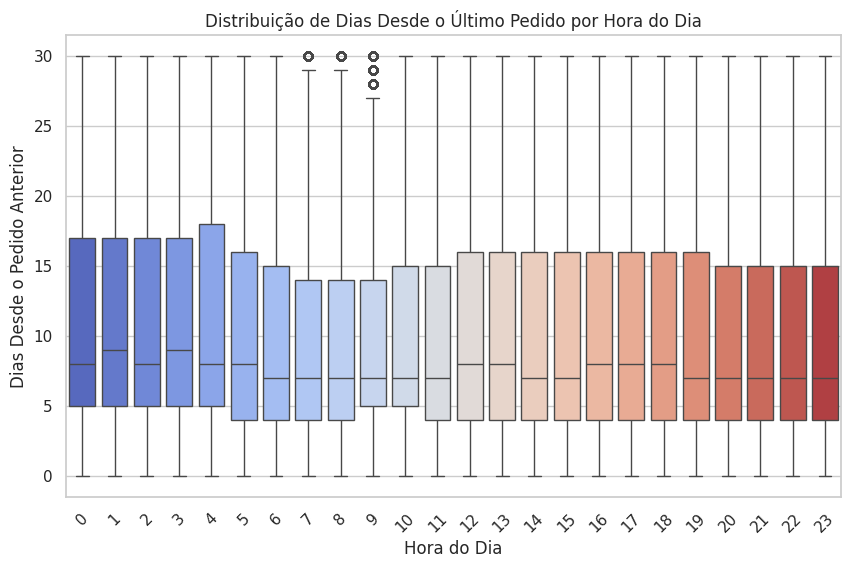

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_hour_of_day', y='days_since_prior_order', data=orders, palette='coolwarm')
plt.title('Distribuição de Dias Desde o Último Pedido por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Dias Desde o Pedido Anterior')
plt.xticks(rotation=45)
plt.show()

Apesar de a mediana ser relativamente constante, nota-se maior variabilidade no período noturno (ex: após 20h), sugerindo que usuários com rotinas menos frequentes também compram nesse horário.

## Boxplot da Hora do Pedido por Dia da Semana

/tmp/ipython-input-44-424534187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_dow', y='order_hour_of_day', data=orders, palette='pastel')


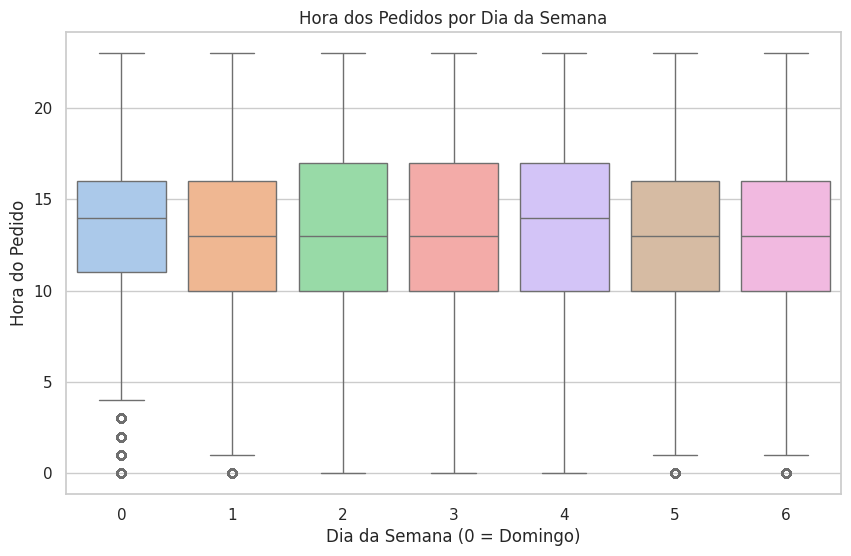

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_dow', y='order_hour_of_day', data=orders, palette='pastel')
plt.title('Hora dos Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Hora do Pedido')
plt.show()

Os pedidos são feitos majoritariamente durante o horário comercial (entre 9h e 17h), com leve variação ao longo da semana. Os domingos (0) e segundas (1) mostram maior concentração nas primeiras horas do dia, sugerindo um comportamento planejado de reabastecimento no início da semana.

## Boxplot do Número Total de Pedidos por Usuário

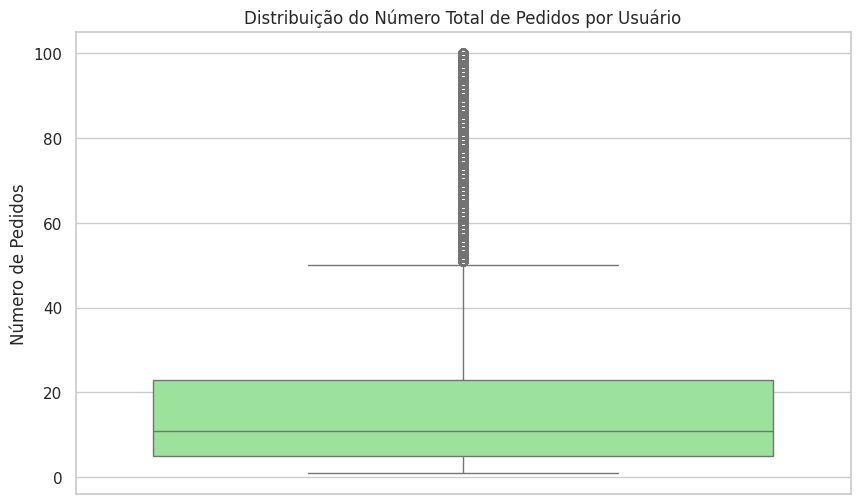

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=orders['order_number'], color='lightgreen')
plt.title('Distribuição do Número Total de Pedidos por Usuário')
plt.ylabel('Número de Pedidos')
plt.show()

A maioria dos usuários realiza até 20 pedidos, mas há uma cauda longa com clientes mais recorrentes. Essa variabilidade pode ser interessante para agrupar usuários em perfis (ex: novos vs. fiéis) ou aplicar estratégias diferentes de recomendação.

## Matriz de Correlação

Mesmo que o dataset contenha poucas variáveis numéricas contínuas, é possível verificar relações entre elas.

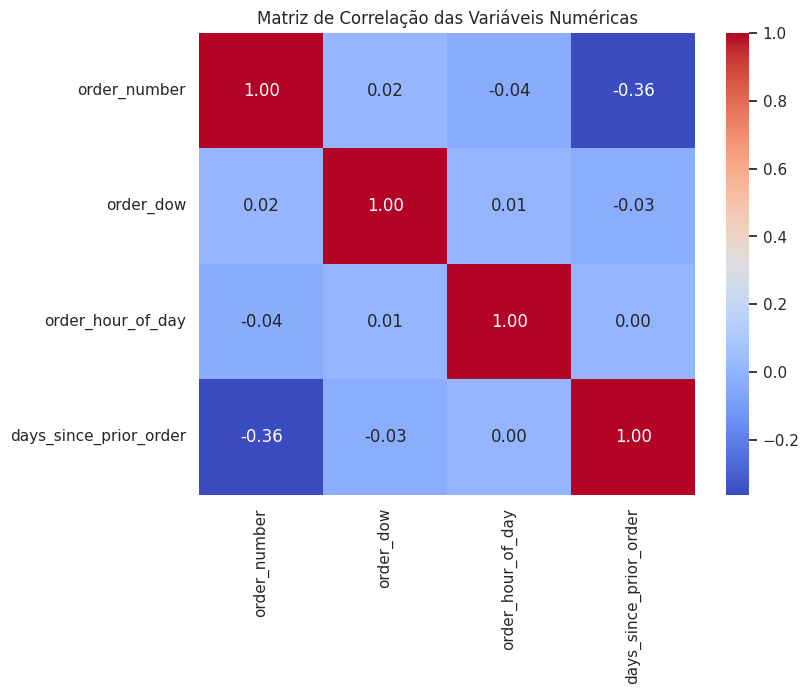

In [ ]:
# Matriz de correlação das variáveis numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(
    orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

Como esperado, a correlação entre as variáveis é fraca, pois representam dimensões distintas do comportamento do usuário (tempo, frequência e ordem dos pedidos). No entanto, a ausência de correlação linear forte é comum em datasets transacionais.

## Tratamento de Valores Nulos

o dataset Instacart possui valores nulos na variável days_since_prior_order. Isso ocorre naturalmente no primeiro pedido de cada usuário, já que não há uma compra anterior.

In [ ]:
# Verificação de valores nulos
print("Valores nulos no dataset Orders:")
print(orders.isnull().sum())

Valores nulos no dataset Orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


Tratamento sugerido para days_since_prior_order, o valor nulo pode ser substituído por 0, indicando que não houve pedido anterior.

In [ ]:
orders['days_since_prior_order'].fillna(0, inplace=True)

/tmp/ipython-input-48-2291960869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['days_since_prior_order'].fillna(0, inplace=True)


# Pré-Processamento de Dados

Como nosso problema é não supervisionado e voltado à análise exploratória e descoberta de padrões, o pré-processamento será focado em:

Seleção de variáveis relevantes.

Criação de variáveis agregadas (como frequência média de recompra por usuário).

Preparação para análise de agrupamentos ou associações.

Nesse caso vamos agrupar pedidos por usuário para calcular média de dias entre pedidos:

In [ ]:
# Média de dias entre pedidos por usuário
user_freq = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
user_freq.rename(columns={'days_since_prior_order': 'avg_days_between_orders'}, inplace=True)

## Normalização

Escalar os dados garante que diferentes variáveis numéricas tenham contribuições comparáveis em análises como clusterização, PCA ou métodos baseados em distância

In [ ]:
# Inicializar o MinMaxScaler
scaler = MinMaxScaler()
user_freq_scaled = scaler.fit_transform(user_freq[['avg_days_between_orders']])

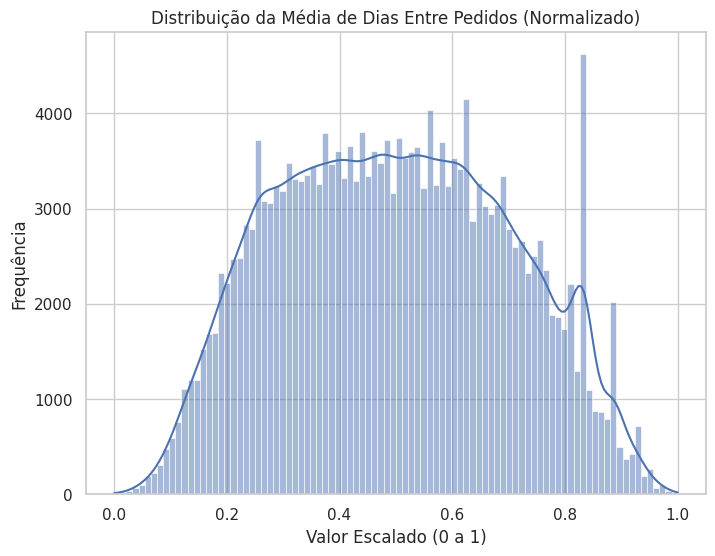

In [ ]:
# Visualizar distribuição após normalização
plt.figure(figsize=(8, 6))
sns.histplot(user_freq_scaled.flatten(), kde=True)
plt.title('Distribuição da Média de Dias Entre Pedidos (Normalizado)')
plt.xlabel('Valor Escalado (0 a 1)')
plt.ylabel('Frequência')
plt.show()

A normalização é ideal para modelos que não assumem uma distribuição específica dos dados e que se baseiam em distâncias absolutas (como K-means). Com isso, os valores são ajustados para o intervalo [0, 1], preservando a forma da distribuição original, mas reduzindo o impacto de escalas diferentes.



## Padronização

A padronização é útil quando o objetivo é aplicar algoritmos que assumem uma distribuição normal dos dados, como PCA, regressão logística, SVMs e redes neurais. Ela centraliza os dados em torno da média 0 com desvio padrão 1.


In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()
user_freq_standardized = scaler_std.fit_transform(user_freq[['avg_days_between_orders']])

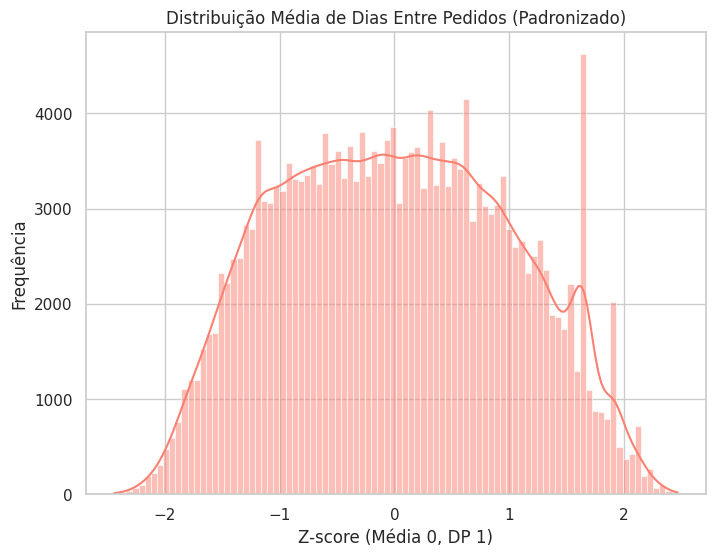

In [ ]:
# Visualização da distribuição padronizada
plt.figure(figsize=(8, 6))
sns.histplot(user_freq_standardized.flatten(), kde=True, color='salmon')
plt.title('Distribuição Média de Dias Entre Pedidos (Padronizado)')
plt.xlabel('Z-score (Média 0, DP 1)')
plt.ylabel('Frequência')
plt.show()

###Escalonamento Robusto
Ideal quando os dados possuem outliers, pois utiliza a mediana e os quartis, ao invés da média e desvio padrão.

In [ ]:
scaler_robust = RobustScaler()
user_freq_robust = scaler_robust.fit_transform(user_freq[['avg_days_between_orders']])

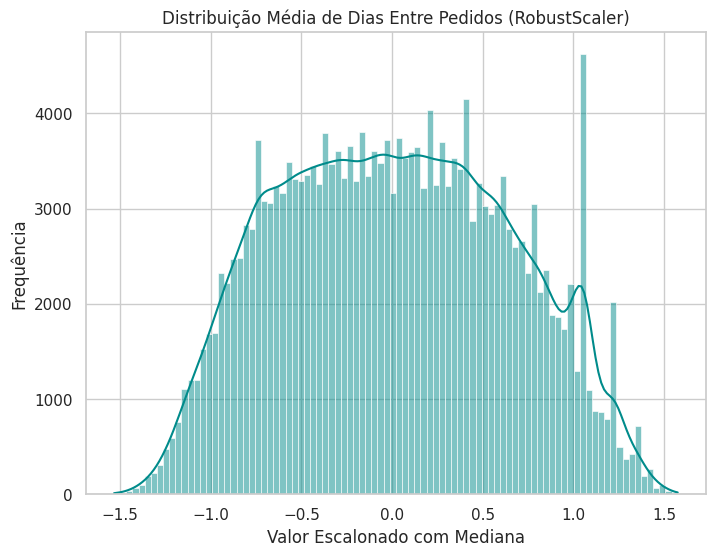

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(user_freq_robust.flatten(), kde=True, color='darkcyan')
plt.title('Distribuição Média de Dias Entre Pedidos (RobustScaler)')
plt.xlabel('Valor Escalonado com Mediana')
plt.ylabel('Frequência')
plt.show()

O RobustScaler é especialmente eficiente para bases transacionais, onde podem existir usuários com comportamentos extremos (muitos ou poucos pedidos). Ele evita que esses outliers distorçam os modelos.

## Outras Transformações e Pré-Processamentos
Agrupamento por perfil de consumo (clusterização).

Regras de associação para encontrar produtos frequentemente comprados juntos.

Engenharia de atributos: dias ativos, frequência semanal, número de categorias diferentes compradas, etc.

# Conclusão

A análise e o pré-processamento do dataset Instacart Market Basket Analysis demonstraram a riqueza de informações presentes em dados transacionais. Por meio de técnicas de EDA, estatísticas descritivas e visualizações, conseguimos compreender padrões de compra dos usuários — incluindo horários e dias mais comuns, produtos com maior recorrência, e comportamentos de recompra.

As hipóteses levantadas foram exploradas e parcialmente confirmadas:

*  Usuários apresentam padrões recorrentes de compra por horário e dia.
*  Há produtos e departamentos com alta taxa de recompra.
*  Associações entre produtos ainda podem ser aprofundadas com regras de associação.
*  Alguns departamentos concentram grande parte das vendas, o que pode direcionar decisões logísticas.

Além disso, o trabalho apresentou uma visão ampla sobre a importância da normalização e padronização, explorando múltiplas técnicas (MinMax, Z-score, RobustScaler e log), reforçando sua utilidade em análises não supervisionadas e em dados com assimetrias ou outliers.

Para tornar o trabalho ainda mais completo, recomenda-se incluir:

*   Aplicação de regras de associação.
*   Clusterização de perfis de consumo.
*   Análise de fidelização por usuário.
*   Visualizações temporais e painéis interativos.

Este estudo demonstra o poder da análise exploratória e o potencial de dados de mercado para gerar insights valiosos para marketing, recomendação e logística, sendo uma base sólida para etapas futuras de modelagem preditiva ou sistemas de recomendação.